In [ ]:
!nvidia-smi

Thu Jun 12 04:09:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install "ultralytics<=8.3.40" roboflow supervision

import ultralytics
ultralytics.checks()

import os
HOME = os.getcwd()
print("Working directory:", HOME)

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)
Working directory: /content


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="API_KEY")
project = rf.workspace("WORKSPACE").project("PROJECT")
dataset = project.version(n).download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Mathematical-Drawing-Instruments-3 in yolov11:: 100%|██████████| 1944/1944 [00:00<00:00, 4859.16it/s]


In [ ]:
!ls {dataset.location}

!cat {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['Compass', 'Divider', 'Eraser', 'Pencil', 'Protractor_180deg', 'Scale_15cm', 'Set_Square_45deg', 'Set_Square_60deg', 'Sharpener']

roboflow:
  workspace: ml-project-68ius
  project: mathematical-drawing-instruments
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/ml-project-68ius/mathematical-drawing-instruments/dataset/3

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='GeoSet-Ennea-yolov11'
)

100%|██████████| 18.4M/18.4M [00:00<00:00, 220MB/s]


New https://pypi.org/project/ultralytics/8.3.153 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Mathematical-Drawing-Instruments-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=GeoSet-Ennea-yolov11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

100%|██████████| 755k/755k [00:00<00:00, 125MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 322MB/s]


AMP: checks passed ✅


train: Scanning /content/Mathematical-Drawing-Instruments-3/train/labels... 676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 676/676 [00:00<00:00, 1895.79it/s]

train: New cache created: /content/Mathematical-Drawing-Instruments-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Mathematical-Drawing-Instruments-3/valid/labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 1660.76it/s]

val: New cache created: /content/Mathematical-Drawing-Instruments-3/valid/labels.cache


Plotting labels to runs/detect/GeoSet-Ennea-yolov11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/GeoSet-Ennea-yolov11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.44G      1.582      2.343      1.569         76        640: 100%|██████████| 43/43 [00:16<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        193       1667      0.644      0.766      0.714      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       4.4G      1.213      1.099      1.268         71        640: 100%|██████████| 43/43 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        193       1667       0.83      0.881      0.925      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.42G      1.194     0.9391      1.257         64        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        193       1667      0.826      0.866      0.915      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.46G      1.163     0.8925      1.255         56        640: 100%|██████████| 43/43 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        193       1667      0.843      0.893      0.947      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.39G      1.163      0.842      1.245         53        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        193       1667      0.923      0.945      0.975      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.41G      1.129     0.7899      1.222         40        640: 100%|██████████| 43/43 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        193       1667      0.936       0.95      0.975      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.41G      1.115     0.7481      1.212         64        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        193       1667      0.922      0.913      0.965      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.42G      1.101     0.7313      1.215         49        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        193       1667      0.952      0.956      0.985      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.38G      1.109     0.7273      1.214         70        640: 100%|██████████| 43/43 [00:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        193       1667      0.949      0.957      0.982      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.45G       1.06     0.6853      1.193         46        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        193       1667      0.959      0.972      0.986      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.4G      1.066     0.6756      1.174         88        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        193       1667      0.974      0.979      0.992       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.41G      1.052     0.6589      1.177         48        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        193       1667      0.968      0.978      0.992      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.39G       1.04     0.6527      1.177         46        640: 100%|██████████| 43/43 [00:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        193       1667      0.958      0.975      0.992      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.39G      1.028     0.6307      1.156         60        640: 100%|██████████| 43/43 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        193       1667      0.978      0.978      0.991      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.4G      1.036     0.6191      1.164         50        640: 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        193       1667      0.979      0.985      0.993      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.41G      1.014     0.6053      1.158         55        640: 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        193       1667      0.977       0.99      0.992      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.39G      1.015     0.6049       1.15         51        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        193       1667      0.989       0.99      0.993      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.41G     0.9997     0.5866      1.146         64        640: 100%|██████████| 43/43 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        193       1667      0.987      0.992      0.993      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.41G     0.9923     0.5745      1.143         55        640: 100%|██████████| 43/43 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        193       1667      0.985      0.991      0.994      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.42G     0.9836     0.5585      1.135         51        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        193       1667      0.994      0.996      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.4G     0.9862     0.5667      1.146         52        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        193       1667      0.987      0.991      0.993      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.42G     0.9854     0.5791      1.146         63        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        193       1667       0.99      0.989      0.994       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.4G      0.969     0.5524      1.132         33        640: 100%|██████████| 43/43 [00:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        193       1667       0.99      0.988      0.994      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.41G     0.9582     0.5298      1.127         57        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        193       1667      0.993      0.991      0.993      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.37G     0.9569     0.5285      1.131         47        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        193       1667      0.995      0.996      0.994      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.4G     0.9522     0.5323      1.122         77        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        193       1667      0.991      0.996      0.993      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.44G     0.9622      0.531      1.123         41        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        193       1667      0.992      0.993      0.994      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.39G     0.9441      0.514      1.122         42        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        193       1667      0.994      0.998      0.993      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.4G     0.9376     0.5148      1.111         84        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        193       1667      0.995      0.997      0.993      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.42G     0.9266      0.504      1.101         77        640: 100%|██████████| 43/43 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        193       1667      0.994      0.996      0.994      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.38G     0.9364     0.4995      1.114         54        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        193       1667      0.992      0.995      0.993      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.44G     0.9305     0.4897      1.111         38        640: 100%|██████████| 43/43 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        193       1667      0.994      0.997      0.994      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.4G     0.9235     0.4918      1.111         65        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        193       1667      0.995      0.997      0.994      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.4G     0.9081     0.4691      1.099         68        640: 100%|██████████| 43/43 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        193       1667      0.992      0.998      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.4G     0.9101     0.4789      1.088         79        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        193       1667      0.995      0.997      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.46G      0.904     0.4723      1.101         69        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        193       1667      0.994      0.996      0.993      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.4G     0.8996     0.4735      1.098         69        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        193       1667      0.995      0.998      0.994      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.46G     0.8993     0.4634      1.093         54        640: 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        193       1667      0.996      0.996      0.994      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.39G     0.8884     0.4553      1.087         58        640: 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        193       1667      0.996      0.998      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.39G     0.8678     0.4485      1.082         43        640: 100%|██████████| 43/43 [00:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        193       1667      0.996      0.998      0.994      0.762


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.36G     0.8274     0.3734      1.057         36        640: 100%|██████████| 43/43 [00:14<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        193       1667      0.996      0.998      0.994      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.39G     0.8147     0.3625      1.046         36        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        193       1667      0.993      0.997      0.994      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.37G     0.7975     0.3546       1.04         31        640: 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        193       1667      0.993      0.997      0.994      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.38G     0.7924     0.3476      1.041         31        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        193       1667      0.995      0.995      0.994      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.36G     0.7888     0.3499      1.043         29        640: 100%|██████████| 43/43 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        193       1667      0.995      0.997      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.41G     0.7854     0.3398      1.036         33        640: 100%|██████████| 43/43 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        193       1667      0.994      0.995      0.994      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.37G     0.7834     0.3399      1.034         34        640: 100%|██████████| 43/43 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        193       1667       0.99      0.998      0.994      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.4G     0.7761     0.3365      1.035         27        640: 100%|██████████| 43/43 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        193       1667      0.991      0.998      0.994      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.38G     0.7631       0.33      1.029         35        640: 100%|██████████| 43/43 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        193       1667      0.992      0.999      0.994      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.38G     0.7631     0.3265      1.034         35        640: 100%|██████████| 43/43 [00:13<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        193       1667      0.995      0.998      0.994      0.776



50 epochs completed in 0.235 hours.
Optimizer stripped from runs/detect/GeoSet-Ennea-yolov11/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/GeoSet-Ennea-yolov11/weights/best.pt, 19.2MB

Validating runs/detect/GeoSet-Ennea-yolov11/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,416,283 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]


                   all        193       1667      0.995      0.998      0.994      0.776
               Compass        186        186      0.988          1      0.993      0.795
               Divider        189        189      0.989          1      0.995      0.764
                Eraser        184        184      0.994          1      0.993      0.668
                Pencil        193        193      0.997      0.995      0.995      0.713
     Protractor_180deg        192        192          1      0.999      0.995      0.838
            Scale_15cm        191        192      0.991      0.995       0.99      0.805
      Set_Square_45deg        189        190      0.995      0.994      0.995       0.86
      Set_Square_60deg        156        156          1      0.998      0.995      0.865
             Sharpener        185        185          1      0.998      0.995      0.674
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect

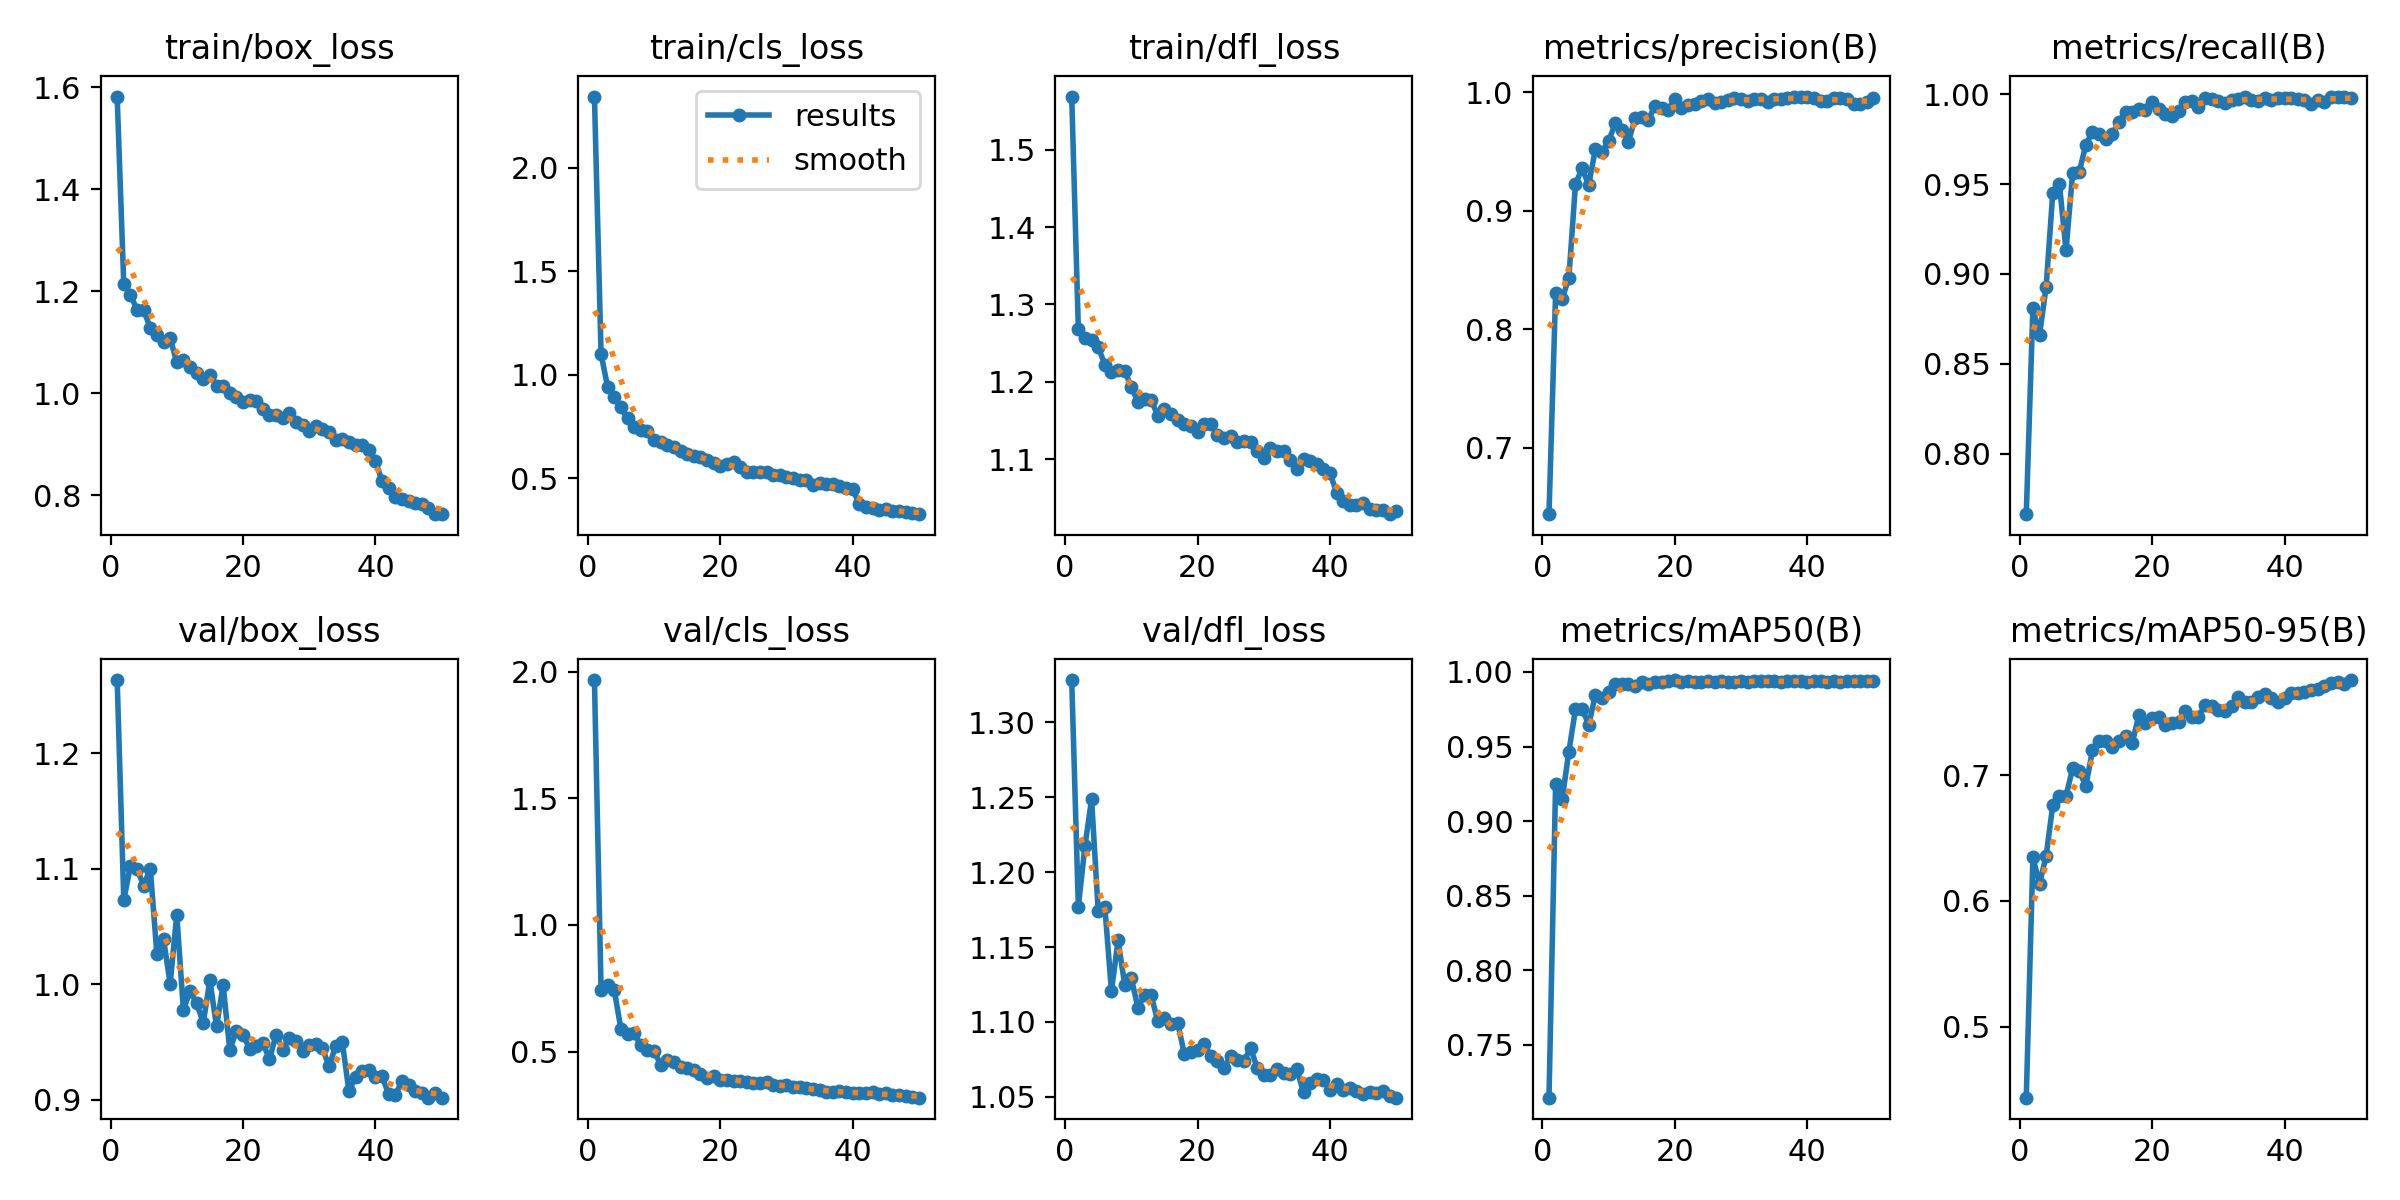

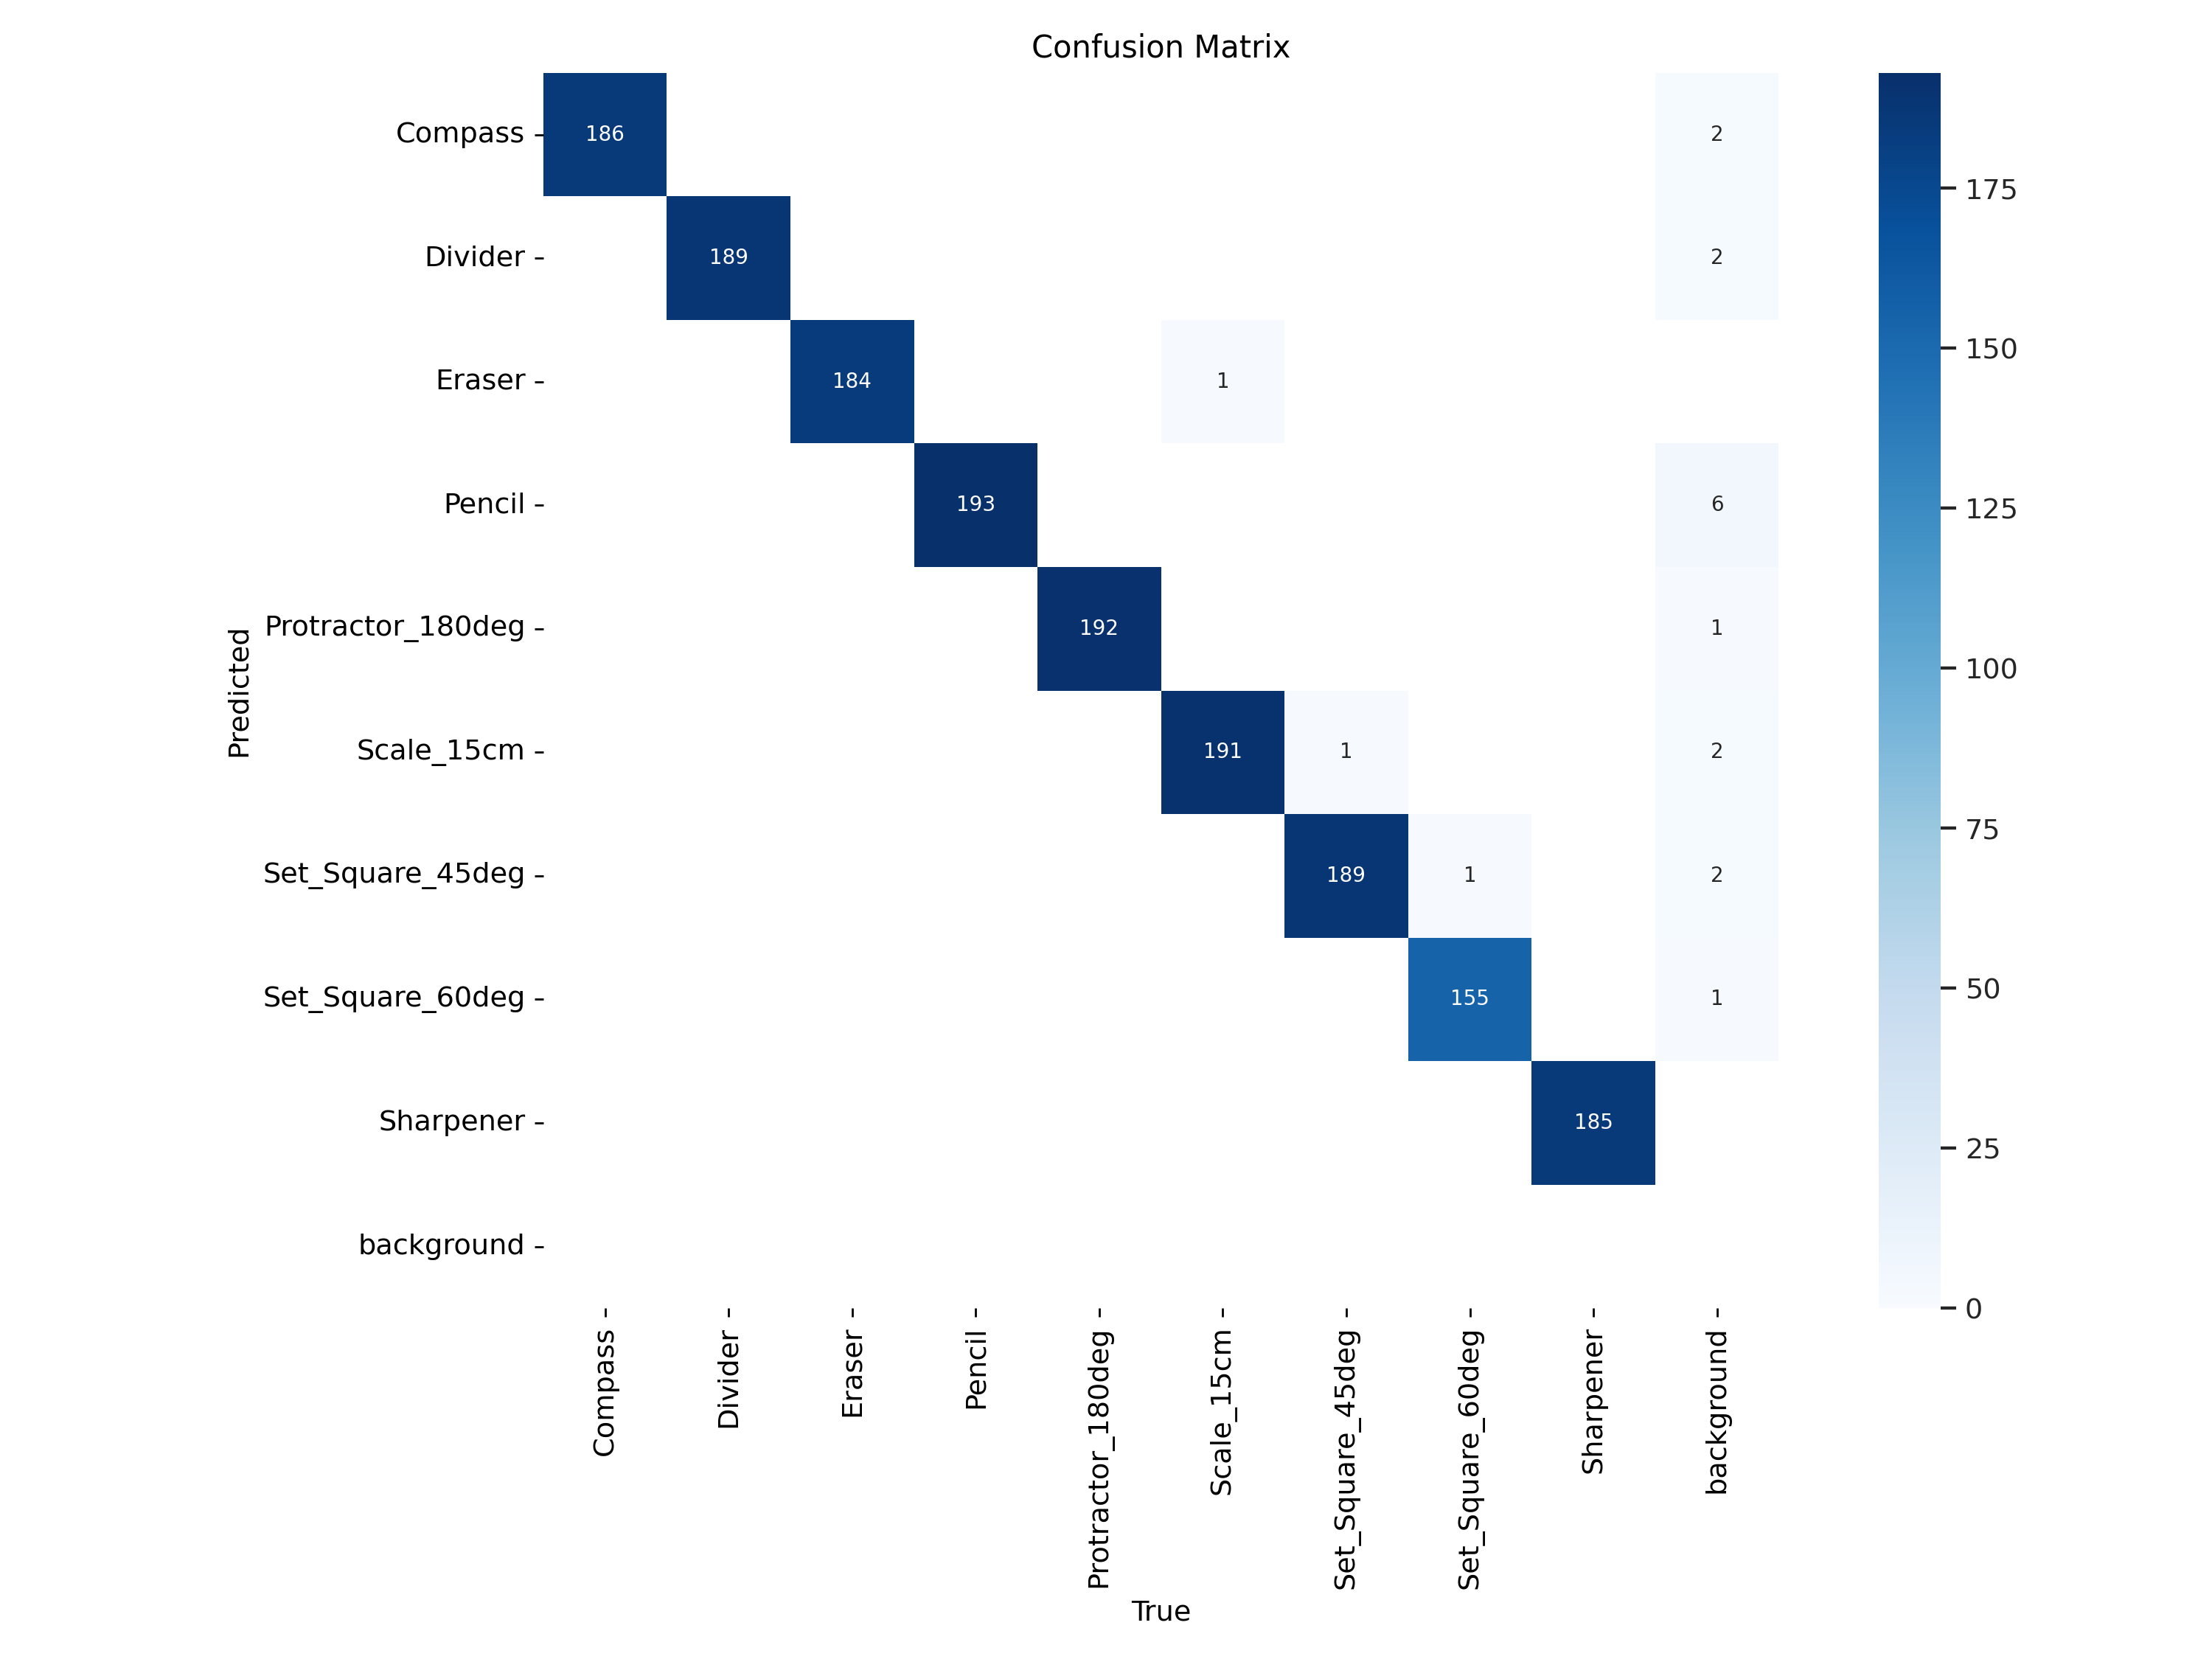

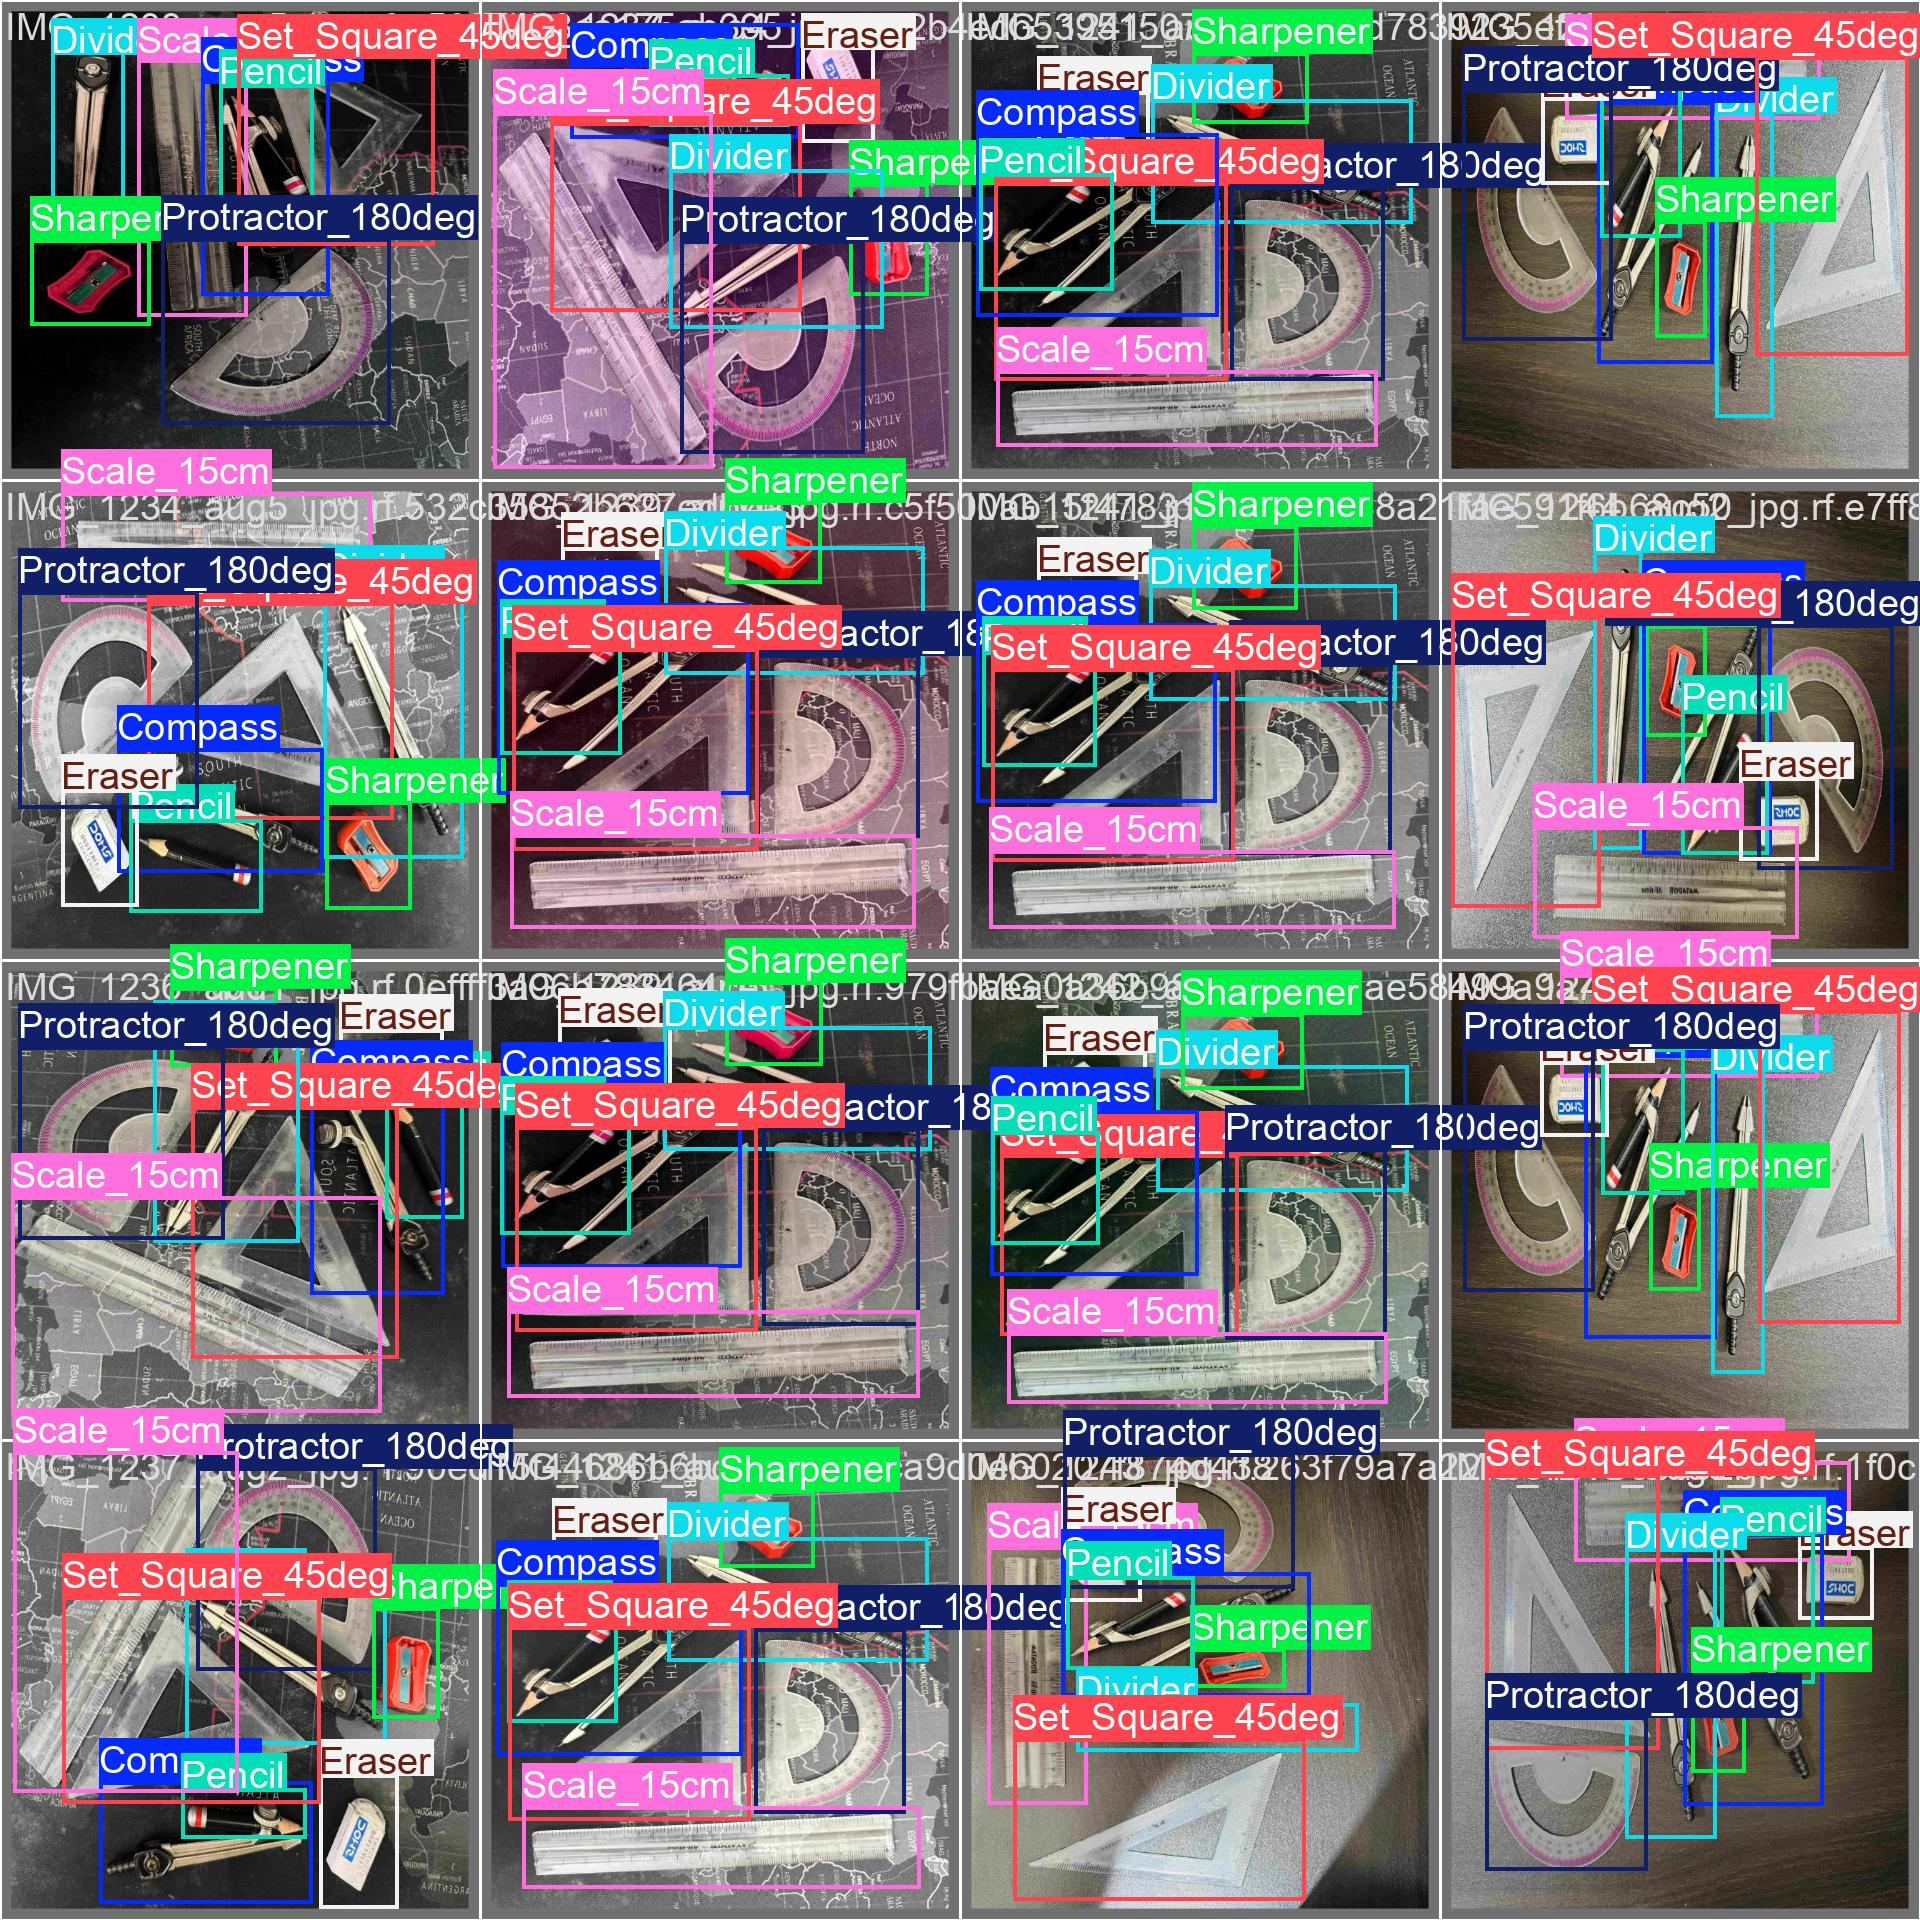

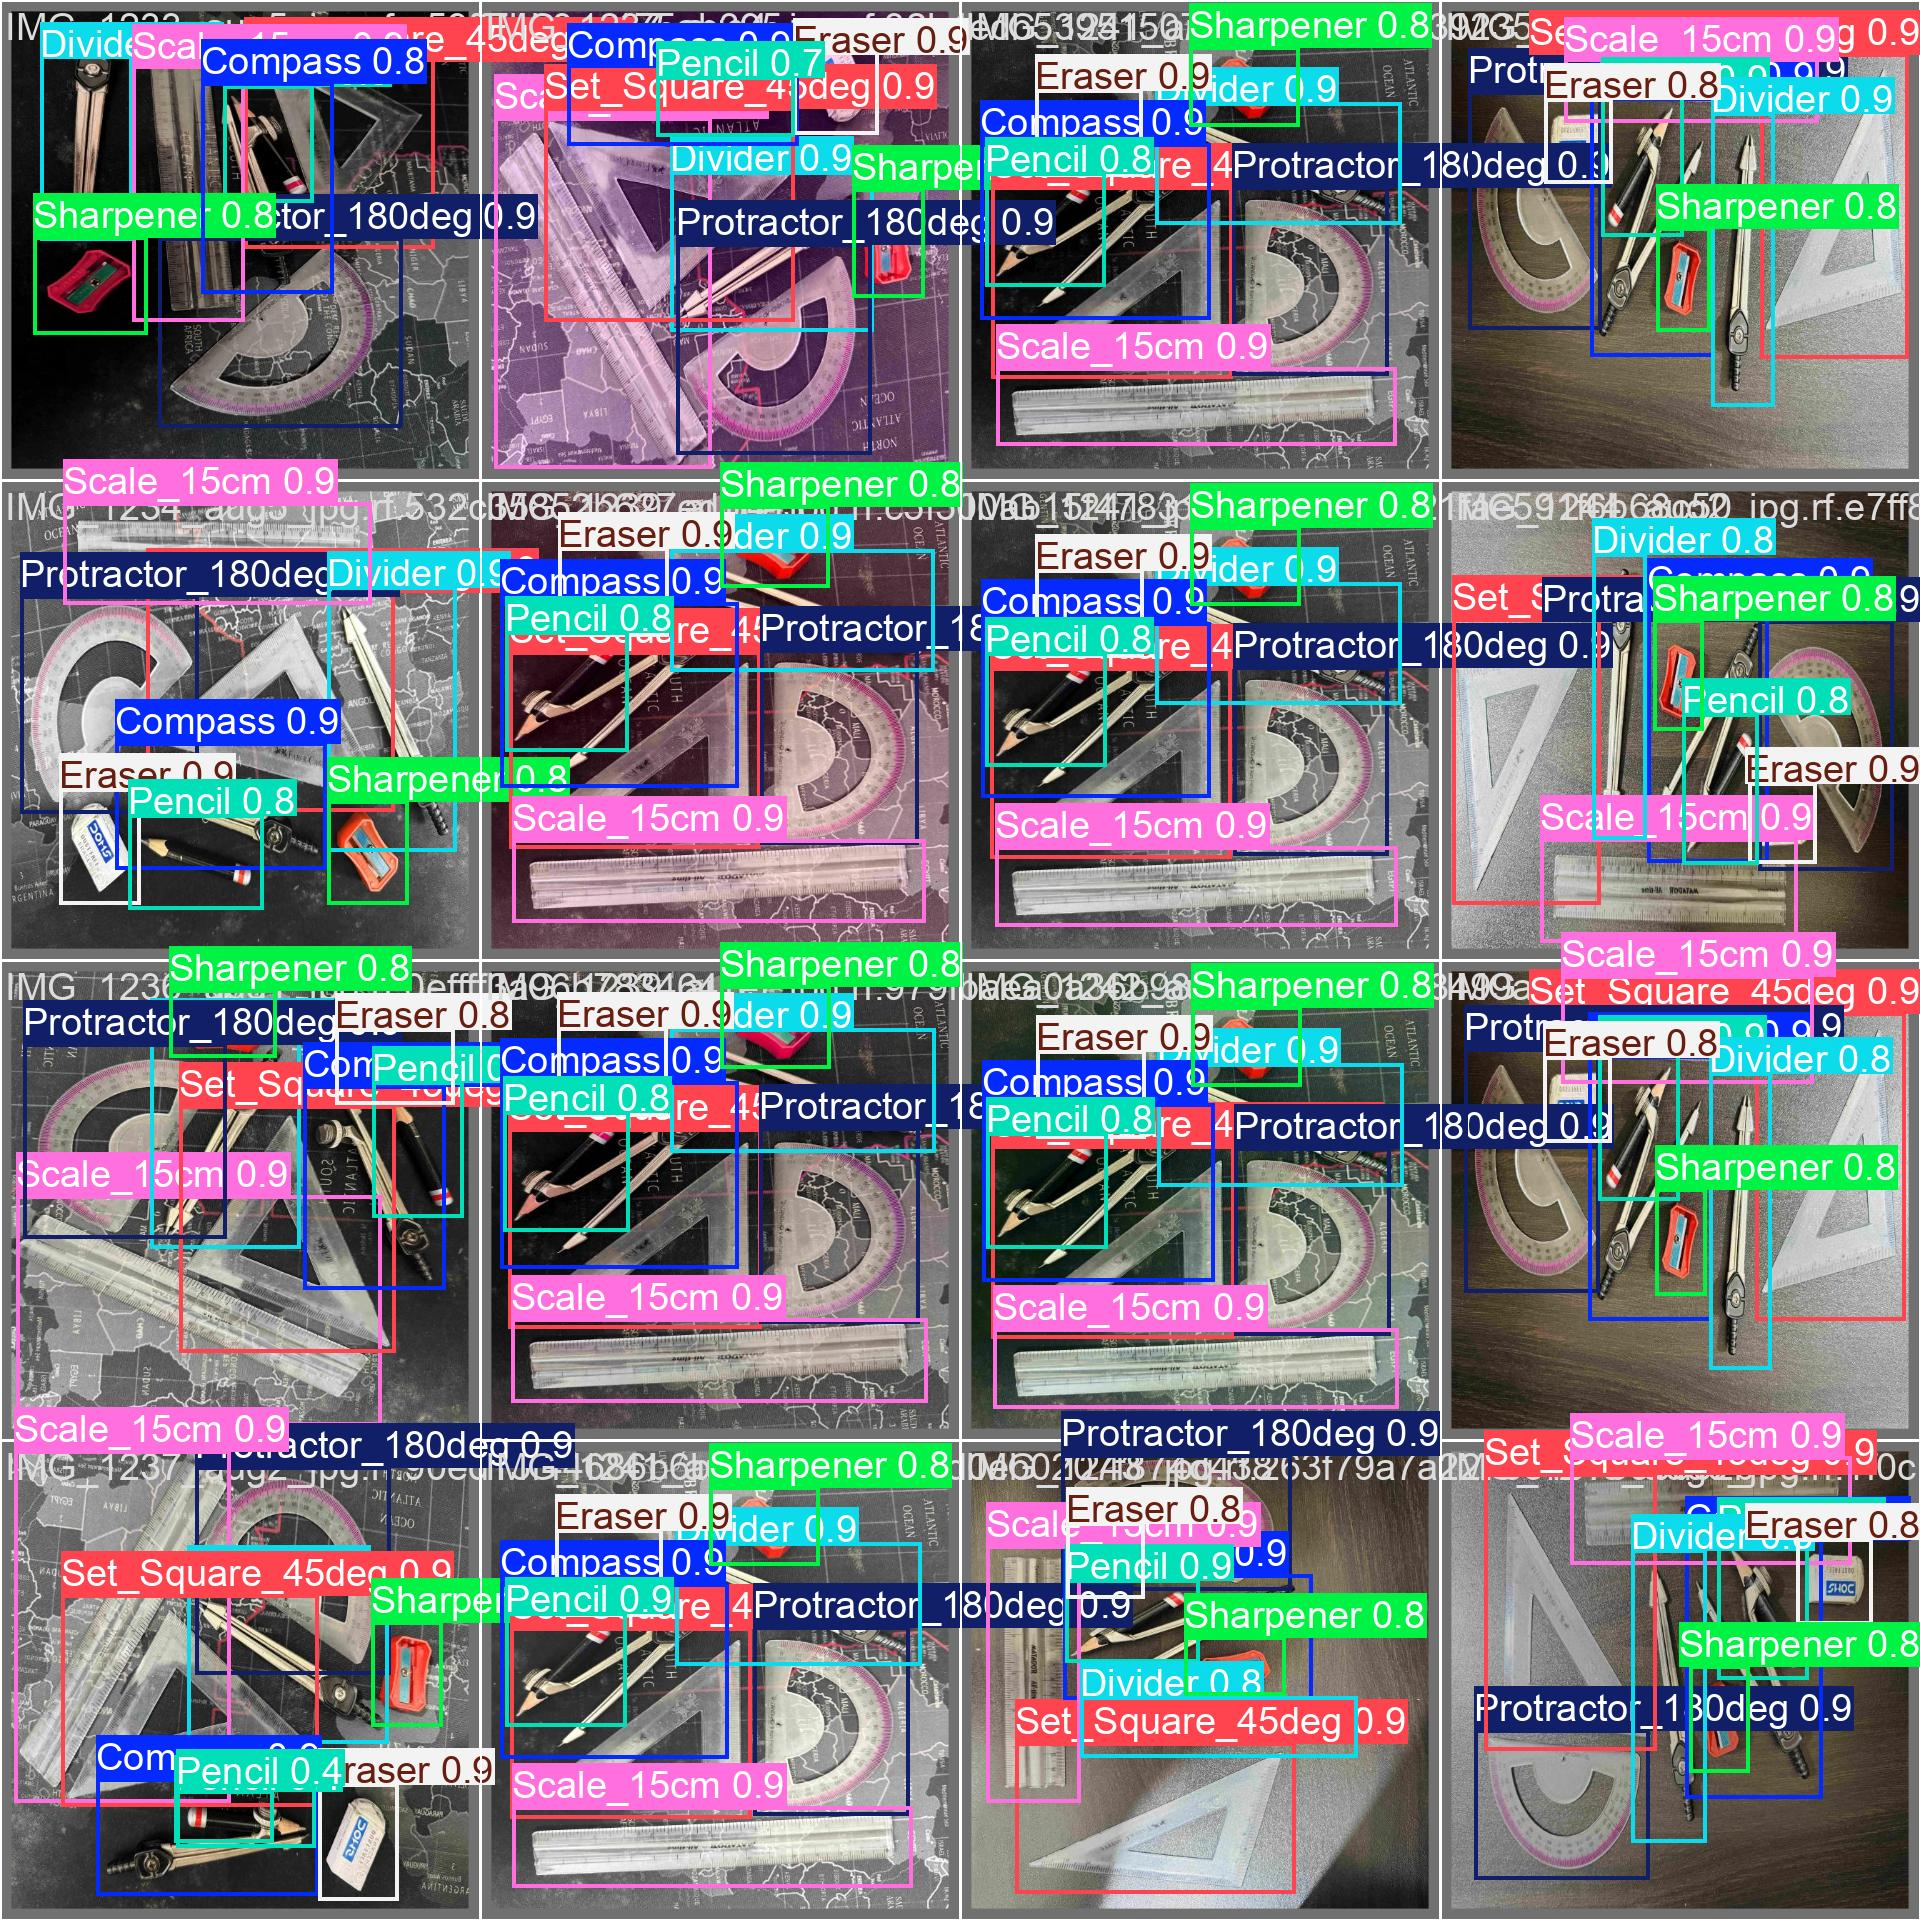

In [ ]:
from IPython.display import Image, display
import os

results_dir = '/content/runs/detect/GeoSet-Ennea-yolov11'

result_files = [
    'results.png',
    'confusion_matrix.png',
    'val_batch0_labels.jpg',
    'val_batch0_pred.jpg'
]

for file in result_files:
    file_path = os.path.join(results_dir, file)
    if os.path.exists(file_path):
        display(Image(filename=file_path, width=800))
        print("\n")
    else:
        print(f"⚠️ File not found: {file_path}")

In [ ]:
!zip -r /content/GeoSet-Ennea-yolov11.zip /content/runs/detect/GeoSet-Ennea-yolov11
from google.colab import files
files.download('/content/GeoSet-Ennea-yolov11.zip')

  adding: content/runs/detect/GeoSet-Ennea-yolov11/ (stored 0%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/confusion_matrix.png (deflated 23%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/PR_curve.png (deflated 19%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/results.csv (deflated 63%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/args.yaml (deflated 52%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/P_curve.png (deflated 16%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/train_batch1722.jpg (deflated 6%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/labels.jpg (deflated 21%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/val_batch0_pred.jpg (deflated 4%)
  adding: content/runs/detect/GeoSet-Ennea-yolov11/train_batch0.jpg (deflated 2%)
  adding: content/runs/detect/GeoSet-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>